In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd


In [16]:
A = np.array([[2, -1, 0],
              [-1, 1, 1],
              [0, 1, 2]])


In [17]:
# 1. ||A||_1
norm_1 = np.linalg.norm(A, 1)
print(f"||A||_1 = {norm_1}")


||A||_1 = 3.0


In [18]:
# 2. ||A||_∞
norm_inf = np.linalg.norm(A, np.inf)
print(f"||A||_∞ = {norm_inf}")


||A||_∞ = 3.0


In [19]:
# 3. ||A||_sum
norm_sum = np.sum(np.abs(A))
print(f"||A||_sum = {norm_sum}")


||A||_sum = 9


In [20]:
# 4. ||A||_F
norm_F = np.linalg.norm(A, 'fro')
print(f"||A||_F = {norm_F:.6f}")


||A||_F = 3.605551


In [21]:
# 5. ||A||_*
norm_nuclear = np.linalg.norm(A, 'nuc')
print(f"||A||_* = {norm_nuclear:.6f}")


||A||_* = 5.000000


In [22]:
def vandermonde_matrix(alphas):
    n = len(alphas)
    V = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            V[i, j] = alphas[i]**j
    return V

p_values = [0.1, 0.5, 0.9]
n_values = [5, 10, 15, 20]

for p in p_values:
    print(f"p = {p}:")
    for n in n_values:
        alphas = [p**k for k in range(1, n+1)]
        V = vandermonde_matrix(alphas)
        cond_num = np.linalg.cond(V)
        print(f"  n = {n}: condition number = {cond_num:.2e}")


p = 0.1:
  n = 5: condition number = 3.79e+10
  n = 10: condition number = 3.63e+27
  n = 15: condition number = 5.30e+32
  n = 20: condition number = 3.47e+69
p = 0.5:
  n = 5: condition number = 2.49e+04
  n = 10: condition number = 1.47e+15
  n = 15: condition number = 2.53e+22
  n = 20: condition number = 3.73e+23
p = 0.9:
  n = 5: condition number = 1.61e+05
  n = 10: condition number = 9.50e+09
  n = 15: condition number = 3.77e+14
  n = 20: condition number = 7.00e+18


In [23]:
p = 0.5
n = 15
alphas = [p**k for k in range(1, n+1)]
V = vandermonde_matrix(alphas)

print(f"\np={p}, n={n}:")
print(f"Condition number: {np.linalg.cond(V):.2e}")

V_inv = np.linalg.inv(V)
I_approx = V @ V_inv
error = np.linalg.norm(I_approx - np.eye(n), 'fro')
print(f"||V * V^(-1) - I||_F = {error:.2e}")



p=0.5, n=15:
Condition number: 2.53e+22
||V * V^(-1) - I||_F = 8.50e+00


In [24]:
confusion_matrix = np.array([
    [25, 3, 2],
    [5, 32, 3],
    [2, 1, 27]
])


In [25]:
# 1. True Positive predictions (overall)
tp_overall = np.trace(confusion_matrix)
print(f"1. True Positive predictions (overall): {tp_overall}")

# 2. False Positive predictions for class A
fp_A = np.sum(confusion_matrix[:, 0]) - confusion_matrix[0, 0]
print(f"2. False Positive predictions for class A: {fp_A}")

# 3. True Positive Rate for class A
tpr_A = confusion_matrix[0, 0] / np.sum(confusion_matrix[0, :])
print(f"3. True Positive Rate for class A: {tpr_A:.3f}")

# 4. Precision for class A
precision_A = confusion_matrix[0, 0] / np.sum(confusion_matrix[:, 0])
print(f"4. Precision for class A: {precision_A:.3f}")

# 5. Accuracy
accuracy = tp_overall / np.sum(confusion_matrix)
print(f"5. Accuracy of the classifier: {accuracy:.3f}")


1. True Positive predictions (overall): 84
2. False Positive predictions for class A: 7
3. True Positive Rate for class A: 0.833
4. Precision for class A: 0.781
5. Accuracy of the classifier: 0.840


In [26]:
H = np.array([[2, -4],
              [-4, 16]])

eigenvalues = np.linalg.eigvals(H)
print(f"Eigenvalues: {eigenvalues}")

if all(eigenvalues > 0):
    print("Classification: Local minimum")
elif all(eigenvalues < 0):
    print("Classification: Local maximum")
else:
    print("Classification: Saddle point")


Eigenvalues: [ 0.93774225 17.06225775]
Classification: Local minimum


In [27]:
def f(x, y):
    return x**2 + 2*y**2 + np.exp(x + y)

def gradient_f(x, y):
    df_dx = 2*x + np.exp(x + y)
    df_dy = 4*y + np.exp(x + y)
    return np.array([df_dx, df_dy])

point = np.array([0.0, 0.0])
step_size = 0.1
precision = 0.05
iterations = 0

while True:
    grad = gradient_f(point[0], point[1])
    grad_norm = np.linalg.norm(grad)
    
    if grad_norm < precision:
        break
    
    point = point - step_size * grad
    iterations += 1

print(f"Iterations: {iterations}")
print(f"Final point: x={point[0]:.6f}, y={point[1]:.6f}")
print(f"Function value: {f(point[0], point[1]):.6f}")
print(f"Gradient norm: {np.linalg.norm(gradient_f(point[0], point[1])):.6f}")


Gradient Descent Progress:
Iteration 0: x=0.0000, y=0.0000, f(x,y)=1.0000
Iteration 5: x=-0.2530, y=-0.1662, f(x,y)=0.7768, |∇f|=0.2080

Converged after 9 iterations
Final point: x=-0.293874, y=-0.161328
Function value: f(x,y)=0.772735
Gradient norm: |∇f|=0.047850


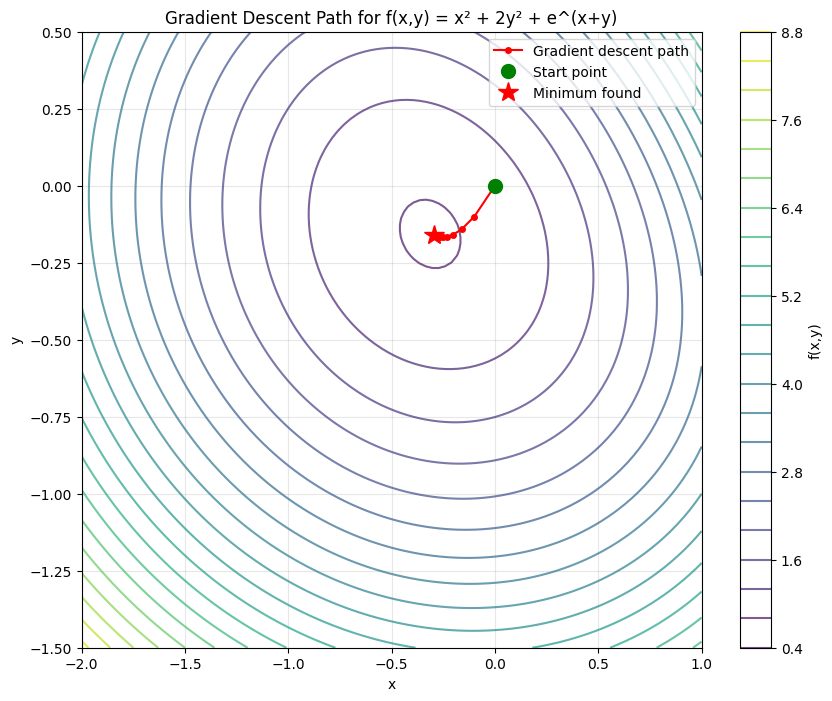


Answer: 9 iterations are necessary to obtain the required precision.


In [ ]:
print(f"\nAnswer: {iterations} iterations are necessary to obtain the required precision.")
